<a href="https://colab.research.google.com/github/attiqrafiq/Py_AIP/blob/master/SVM_AIP_OneVsRest_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#cross_validation -> model_selection
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Automatically created module for IPython interactive environment


In [0]:
url = 'https://raw.githubusercontent.com/attiqrafiq/Py_AIP/master/FVsNew1.csv'


In [0]:
train=pd.read_csv(url)#'FVsNew1.csv')

In [0]:
X = train.iloc[0:,0:153]
Y = train.iloc[0:,153:154]

In [10]:
print(Y)

       L1
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
...   ...
5017  0.0
5018  0.0
5019  0.0
5020  0.0
5021  0.0

[5022 rows x 1 columns]


In [0]:
# Binarize the output
y = label_binarize(Y, classes=[0, 1])
n_classes = 2

In [8]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [0]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [0]:
# Learn to predict each class against the other
#kernel='rbf',max_iter=50000, gamma=0.00001, C=1000,probability=True
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',max_iter=-1, gamma='scale', C=1.0,probability=True)) #SVC(kernel='rbf', gamma=0.00001, C=1000,probability=True)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)#decision_function(X_test)#
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.53
Accuracy of SVM classifier on test set: 0.52


In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_score[:,i].ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])

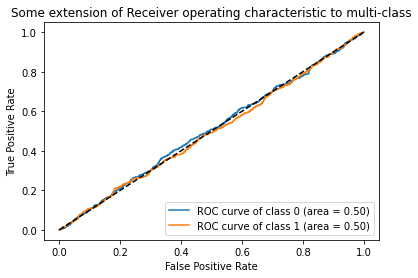

In [0]:
# Plot ROC curve
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()